# Лабораторная работа №1
## Анализ пассажиров корабля "Титаник"

**Заполните недостающий код ("You code here")**

In [305]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)

** Чтение данных в Pandas DataFrame**

In [306]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


**Первые 5 строк**

In [307]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [308]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


**Давайте выберем тех пассажиров, которые отправились в Cherbourg (Embarked = C) и заплатили > 200 фунтов за билет (fare > 200).**

Убедитесь, что вы понимаете, как на самом деле работает эта конструкция.

In [309]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


** Мы можем отсортировать этих людей по тарифу (Fare) в порядке убывания. **

In [310]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Давайте добавим новый признак.**

In [311]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [312]:
age_categories = [age_category(age) for age in data.Age]
data['Age_category'] = age_categories
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,2.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,2.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,2.0


**Другой способ сделать это с `apply`.**

In [313]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин было на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [314]:
male = len(data[data['Sex'] == 'male'])
female = len(data[data['Sex'] == 'female'])
print(f'{male} мужчин и {female} женщин')

577 мужчин и 314 женщин


**2. Определите распределение функции `Pclass`. Теперь Для мужчин и женщин отдельно. Сколько людей из второго класса было на борту?**
- 104
- 108
- 112
- 125

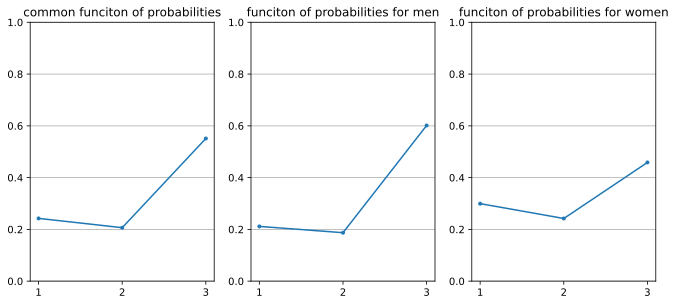

184 человека из второго класса было на борту
108 мужчин было на борту со второго класса


In [326]:
classes = data['Pclass'].unique()
classes.sort()


def count_probabilities(sex):
    dict = {}
    person_total = data['Sex'].eq(sex).sum()
    for clas in classes:
        dict[clas] = len(data[(data.Pclass == clas) 
                              & (data.Sex == sex)]) / person_total
    return dict

men = count_probabilities('male')
women = count_probabilities('female')

common = {}
person_total = data['Pclass'].notnull().sum()
for clas in classes:
    common[clas] = data['Pclass'].eq(clas).sum() / person_total

plt.subplot(1,3,1)
plt.plot(list(common.keys()), list(common.values()), marker='.')
plt.title('common funciton of probabilities')
plt.ylim(0, 1)   # set the ylim to bottom, top
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(axis='y')


plt.subplot(1,3,2)
plt.plot(list(men.keys()), list(men.values()), marker='.')
plt.title('funciton of probabilities for men')
plt.ylim(0, 1)   # set the ylim to bottom, top
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(axis='y')


plt.subplot(1,3,3)
plt.plot(list(women.keys()), list(women.values()), marker='.')
plt.title('funciton of probabilities for women')
plt.ylim(0, 1)   # set the ylim to bottom, top
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.grid(axis='y')


plt.subplots_adjust(left=0.1,
                    bottom=1, 
                    right=1.55, 
                    top=1.9)


plt.show()

second_class = len(data[data['Pclass']==2])
print(f'{second_class} человека из второго класса было на борту')
men_from_second_class = data[(data['Pclass']== 2) & (data['Sex'] == 'male')].shape[0]
print(f'{men_from_second_class} мужчин было на борту со второго класса')

**3. Каковы медиана и стандартное отклонение`Fare`?. Округлите до 2-х знаков после запятой.**
- медиана 14,45, стандартное отклонение 49,69
- медиана 15,1, стандартное отклонение 12,15
- медиана 13,15, стандартное отклонение 35,3
- Медиана 17,43, стандартное отклонение - 39,1.

In [327]:
median, std = data['Fare'].median().round(2), data['Fare'].std().round(2)
print(f'медиана {median}, стандартное отклонение {std}')

медиана 14.45, стандартное отклонение 49.69


**4. Правда ли, что средний возраст выживших людей выше, чем у пассажиров, которые в конечном итоге умерли?**
- Да
- Нет


In [328]:
s_and_d = data.groupby('Survived')['Age'].mean()
print(f'Нет, у выживших средний возраст {s_and_d[1].round(2)}, у мертвых - {s_and_d[0].round(2)}')


Нет, у выживших средний возраст 28.34, у мертвых - 30.63


**5. Это правда, что пассажиры моложе 30 лет. выжили чаще, чем те, кому больше 60 лет. Каковы доли выживших людей среди молодых и пожилых людей?**
- 22,7% среди молодежи и 40,6% среди пожилых
- 40,6% среди молодежи и 22,7% среди пожилых
- 35,3% среди молодежи и 27,4% среди пожилых
- 27,4% среди молодежи и 35,3% среди пожилых

In [329]:
young_total = data[data['Age'] < 30].shape[0]
young_survived = data[(data['Age'] < 30) & data['Survived']].shape[0]
young_pct = young_survived / young_total * 100

old_total = data[data['Age'] > 60].shape[0]
old_survived = data[(data['Age'] > 60) & data['Survived']].shape[0]
old_pct = old_survived / old_total * 100
print(
    f'{round(young_pct, 1)}% среди молодежи и {round(old_pct,1)}% среди пожилых'
)

40.6% среди молодежи и 22.7% среди пожилых


**6. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших людей среди мужчин и женщин?**
- 30,2% среди мужчин и 46,2% среди женщин
- 35,7% среди мужчин и 74,2% среди женщин
- 21,1% среди мужчин и 46,2% среди женщин
- 18,9% среди мужчин и 74,2% среди женщин

In [330]:
info = pd.crosstab(data.Sex, data.Survived, normalize='index').round(3) * 100
men = info[1][1].round(1)
women = info[0][1]
print(f'{men}% среди мужчин и {women}% среди женщин')
info

18.9% среди мужчин и 81.10000000000001% среди женщин


Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


**7. Какое имя наиболее популярно среди пассажиров мужского пола?**
- Charles
- Thomas
- William
- John

In [331]:
mens = data[data['Sex'] == 'male']['Name']
def get_first_name(Name):
    return Name.split(',')[1].split()[1]
names = [get_first_name(Name) for Name in mens]
most_popular_name = pd.Series(names).value_counts().index[0]
print(most_popular_name)

William


**8. Как средний возраст мужчин / женщин зависит от `Pclass`? Выберите все правильные утверждения:**
- В среднем мужчины 1 класса старше 40 лет
- В среднем женщины 1 класса старше 40 лет
- Мужчины всех классов в среднем старше, чем женщины того же класса
- В среднем, пассажиры первого класса старше, чем пассажиры 2-го класса, которые старше, чем пассажиры 3-го класса.

In [332]:
info = pd.crosstab(index=data.Sex,
                   columns=data.Pclass,
                   values=data.Age,
                   aggfunc='mean')
firstC_men_aver_age = info[1]['male']

firstC_women_aver_age = info[1]['female']

# all_class_men_aver_age = info.loc['male'].mean()
# all_class_women_aver_age = info.loc['female'].mean()

first_class_aver_age = info[1].mean()
second_class_aver_age = info[2].mean()
third_class_aver_age = info[3].mean()

print('1 утверждение', firstC_men_aver_age > 40)
print('2 утверждение', firstC_women_aver_age > 40)
print(f"""3 утверждение:
    1 class age: men > women { info[1]['male'] > info[1]['female']}
    2 class age: men > women { info[2]['male'] > info[2]['female']}
    3 class age: men > women { info[3]['male'] > info[3]['female']}\n
""")
print('4 утверждение', first_class_aver_age > second_class_aver_age > third_class_aver_age)
info


1 утверждение True
2 утверждение False
3 утверждение:
    1 class age: men > women True
    2 class age: men > women True
    3 class age: men > women True


4 утверждение True


Pclass,1,2,3
Sex,,,
female,34.61,28.72,21.75
male,41.28,30.74,26.51



Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.